In [108]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

def plot_perf(file_name, metric):   
    df1 = pd.read_csv(file_name, header=-1, skiprows=4)
    ttl_var = file_name.replace('./dqn_full_', '').replace('_model_perf.txt', '')
    df1.columns = ['Epoch','Epsilon', 'Batch','Ys','Recall','Precision','F1', 'Query']
    df1['BatchIndex'] = df1['Batch'].str.split("minibatch ").str[1].str.split('/').str[0].astype(int)
    df1['Nbatches'] = df1['Batch'].str.split("/").str[1].astype(int)
    df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').str.replace('\{','').astype(float)
    df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').str.replace('\}','').astype(float)
    df1['F1'] = df1['F1'].str.replace("F1 = ",'').str.replace('\}','').astype(float)
    df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)
    df1['Ys1'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[0].astype(int)
    df1['YsT'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[1].astype(int)
    df1['Ys0'] = df1['YsT'] - df1['Ys1']
    df1['Query'] = df1['Query'].str.replace('query = ', '').str.replace("\t", '').str.strip()
    ms = []

    for query in df1['Query'].unique():
        df1ss = df1[df1['Query']==query]
        grouped = df1ss[[metric, 'Epoch', 'BatchIndex']].groupby(['Epoch', 'BatchIndex'])
        df2 = grouped.agg({np.min, np.mean, np.max })
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename_axis(None, axis=1)
        df2 = df2.reset_index()

        plt.figure(figsize=(16, 8))
        plt.ylim(0,1)
        for btch in df2.BatchIndex.unique():
            plt.plot(df2[df2['BatchIndex']==btch]['Epoch'], df2[df2['BatchIndex']==btch]['mean'])

        plt.title("F1 measure for each minibatch on %s data using %s model" % (query, ttl_var) )
        plt.grid()
        plt.show()


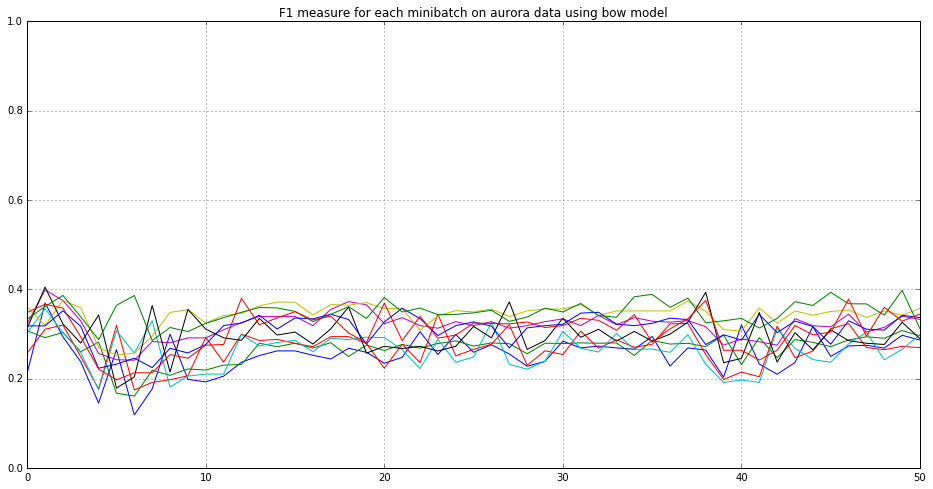

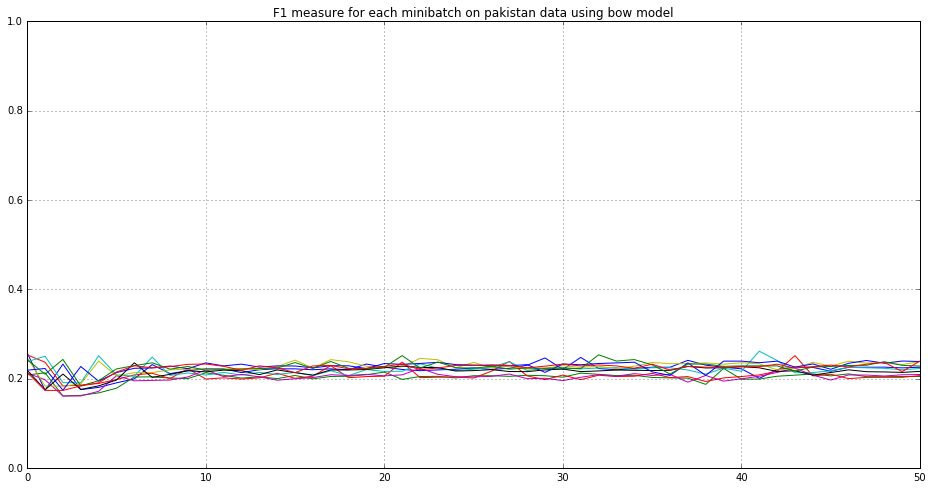

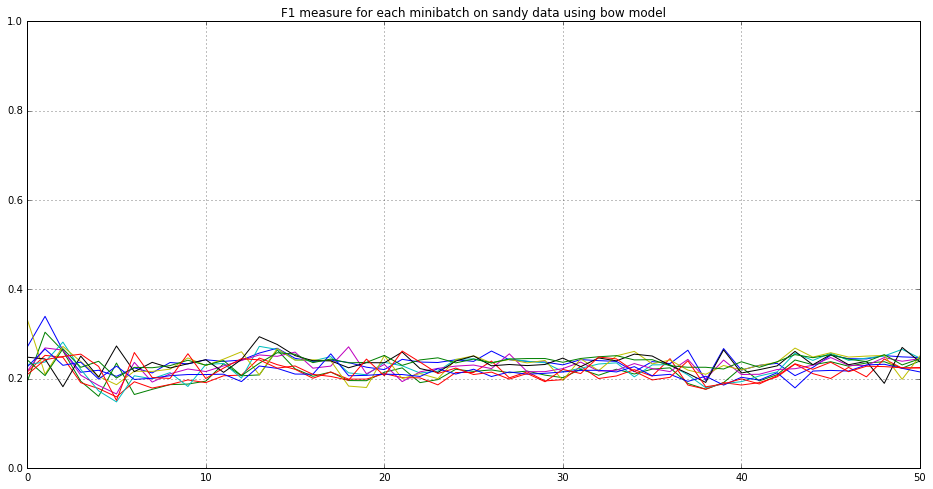

In [109]:
plot_perf('./dqn_full_bow_model_perf.txt', 'F1')

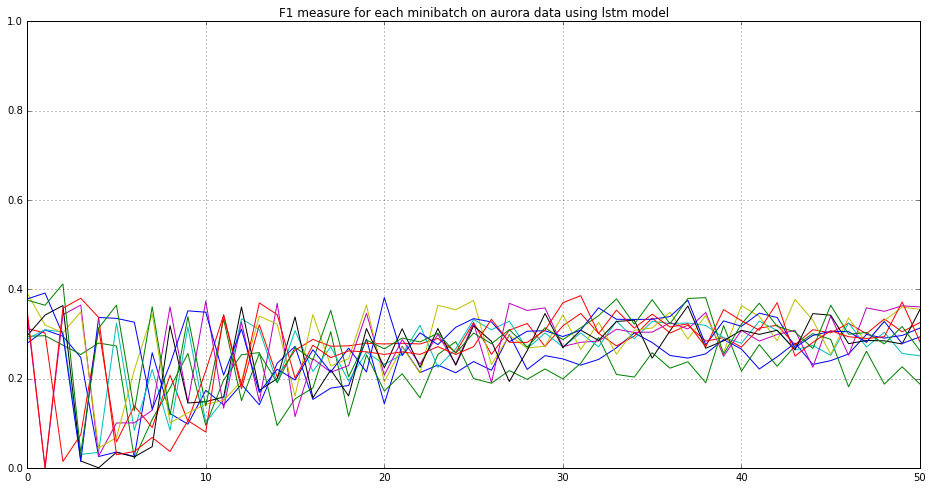

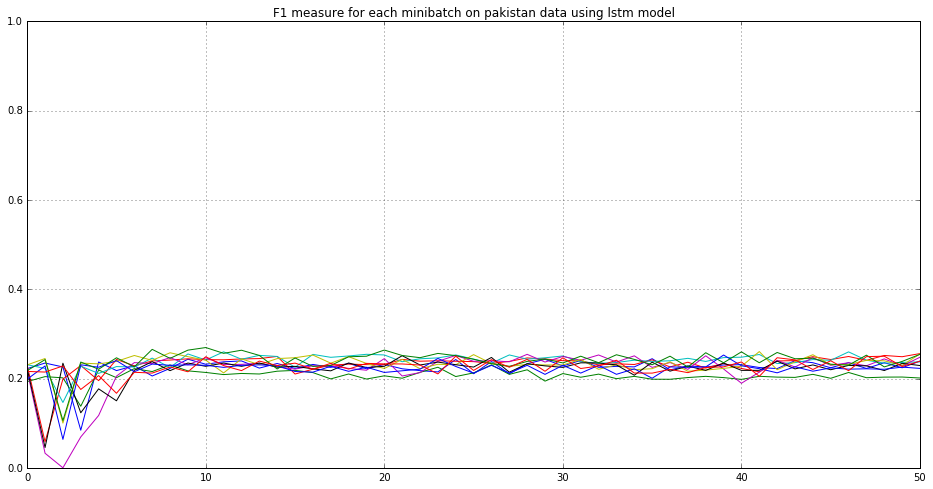

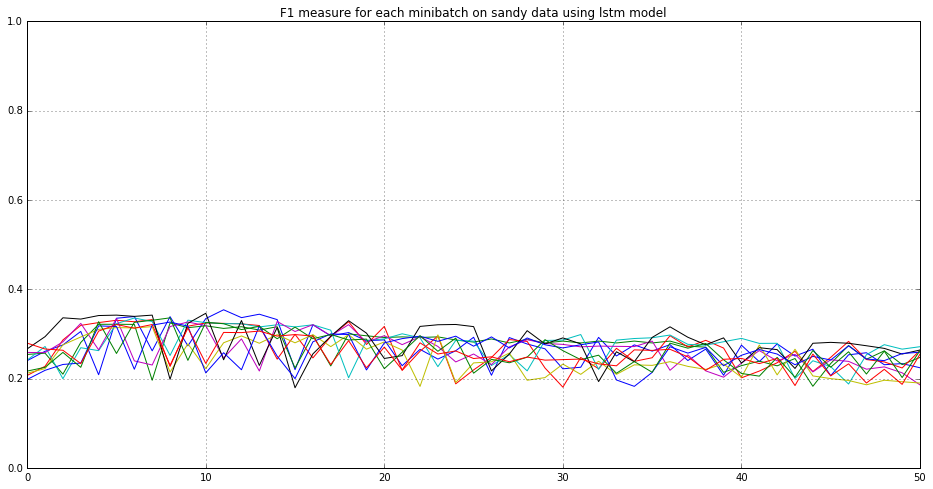

In [110]:
plot_perf('./dqn_full_lstm_model_perf.txt', 'F1')